In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbStabilizerCode import FiveQbStabilizerCodeCircuit
from functions import *


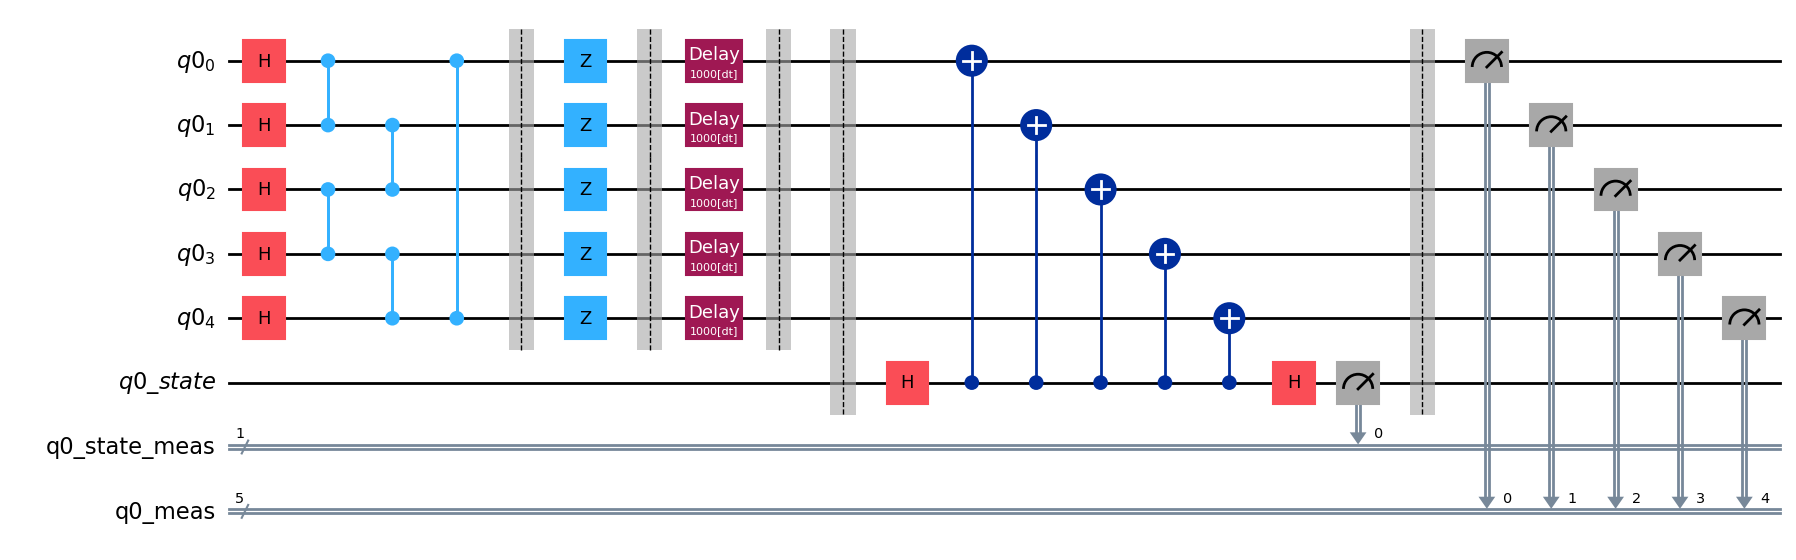

In [3]:


def load_circuit(delay):
    qc = FiveQbStabilizerCodeCircuit(1)

    type = '-'
    qc.encode(type=type)
    qc.z()
    
    qc.delay(delay)

    qc.measure(basis='X')
    qc.measure_all()

    return qc

qc = load_circuit(1000)
qc.draw('mpl')



In [4]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_kyiv")

In [5]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 15
Transpiled Circuit Depth: 93


In [6]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.222 ns


In [7]:
# t_array = [t*2_000 for t in range(0, 6)] # brisbane
t_array = [t*4_500 for t in range(0, 6)] # kyiv
print([round(t*dt * 10**(-3), 3) for t in t_array])
# t_array = [0]


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


In [10]:

circuits = []

for t in t_array:

    qc = load_circuit(t)

    isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=10,
                                initial_layout = [41, 42, 53, 40, 43, 34]
                                )
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} us")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")
    print(get_layout(circuits[-1], qb_len=6))

Circuit Depth: 72
Delay Duration: 0.0 us
Total Duration: 14.912 us

[41, 42, 53, 40, 43, 34]


C:\Users\marzu\AppData\Local\Temp\ipykernel_43760\2101990654.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 74
Delay Duration: 1.0 us
Total Duration: 15.915 us

[41, 42, 53, 40, 43, 34]


C:\Users\marzu\AppData\Local\Temp\ipykernel_43760\2101990654.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 74
Delay Duration: 2.0 us
Total Duration: 16.914 us

[41, 42, 53, 40, 43, 34]


C:\Users\marzu\AppData\Local\Temp\ipykernel_43760\2101990654.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 74
Delay Duration: 3.0 us
Total Duration: 17.913 us

[41, 42, 53, 40, 43, 34]


C:\Users\marzu\AppData\Local\Temp\ipykernel_43760\2101990654.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 73
Delay Duration: 4.0 us
Total Duration: 18.912 us

[41, 42, 53, 40, 43, 34]


C:\Users\marzu\AppData\Local\Temp\ipykernel_43760\2101990654.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 74
Delay Duration: 5.0 us
Total Duration: 19.915 us

[41, 42, 53, 40, 43, 34]


C:\Users\marzu\AppData\Local\Temp\ipykernel_43760\2101990654.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


In [8]:
simulation_result = sampler_simulation(qc.physical_circuit, 3200)
for lq in qc.qubits:

    state = lq.qb_measure
    print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")

    state = lq.qb_measures
    print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")



  q0_state_meas: {'0': 3200}
  q0_meas: {'10110': 100, '11000': 98, '01111': 101, '10001': 106, '00110': 82, '10100': 88, '11110': 116, '01010': 107, '00101': 104, '11011': 104, '01110': 115, '00010': 97, '00111': 86, '01001': 99, '10000': 106, '11010': 80, '01101': 105, '11101': 102, '10011': 100, '00001': 100, '10101': 112, '11100': 96, '01000': 104, '11001': 105, '11111': 91, '01100': 108, '00011': 99, '10010': 89, '10111': 114, '00000': 96, '01011': 87, '00100': 103}


In [9]:
sampler = SamplerV2(backend=backend)
shots = 3200
# job = sampler.run(circuits, shots=shots)
# job = service.job('cybyc5gnrmz0008673jg') # sin delay, 1000 shots
# job = service.job('cyg55r701rbg008fk08g') # 3200 shots, t_array = [t*2_000 for t in range(0, 6)]
job = service.job('cym0764nrmz0008tv360') # kyiv, 3200 shots, t_array = [t*4_500 for t in range(0, 6)]


pub_result = job.result()



In [10]:
states = [bin(i)[2:].zfill(5) for i in range(2**5)]

results = []
logical_meas_results = []

for i in range(len(t_array)):
    result = pub_result[i]
    
    meas = result['__value__']['data']['q0_meas'].get_counts()
    res = {}
    for k in states:
        k_inv = k[::-1]
        res[k] = meas[k_inv] if k_inv in meas else 0
        res[k] = res[k] / shots * 100 # %
    results.append(res)

    logical_meas_results.append(result['__value__']['data']['q0_state_meas'].get_counts())

In [11]:

delays = [round(t*dt/1000) for t in t_array]


In [12]:

# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(results[i][s]*shots/100) for s in states], sep='\t ')

 delay (μs)	 00000	 00001	 00010	 00011	 00100	 00101	 00110	 00111	 01000	 01001	 01010	 01011	 01100	 01101	 01110	 01111	 10000	 10001	 10010	 10011	 10100	 10101	 10110	 10111	 11000	 11001	 11010	 11011	 11100	 11101	 11110	 11111
----------------------------------------------------------------------------------
 0		 140	 89	 114	 106	 108	 119	 145	 110	 65	 126	 87	 83	 70	 78	 71	 107	 116	 102	 114	 87	 117	 116	 142	 109	 106	 93	 66	 104	 53	 97	 72	 88
 1		 124	 80	 146	 71	 105	 102	 129	 111	 83	 96	 119	 99	 80	 104	 90	 109	 167	 99	 134	 88	 132	 118	 141	 122	 65	 74	 52	 72	 70	 102	 38	 78
 2		 111	 67	 163	 118	 107	 97	 85	 97	 103	 80	 83	 90	 78	 88	 80	 145	 181	 124	 102	 117	 152	 119	 100	 113	 76	 86	 83	 77	 79	 101	 43	 55
 3		 113	 65	 160	 114	 122	 108	 116	 121	 111	 62	 94	 92	 66	 68	 90	 135	 166	 160	 89	 91	 133	 127	 93	 107	 84	 81	 57	 82	 82	 92	 44	 75
 4		 123	 78	 162	 122	 135	 91	 98	 137	 93	 59	 91	 93	 86	 62	 97	 108	 113	 128	 93	 9

In [13]:
valid_states = states

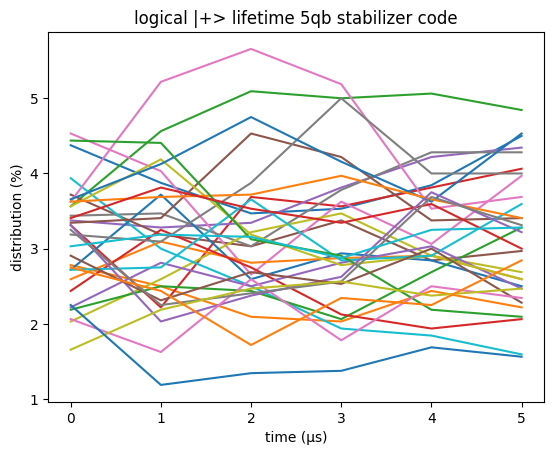

In [14]:
import matplotlib.pyplot as plt
import math

# x = [math.log(d) for d in delays]
x = delays
y = {}
for s in states:
    y[s] = [r[s] for r in results]

    plt.plot(x, y[s], label=s)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime 5qb stabilizer code')
# plt.legend()

# Display the plot
plt.show()

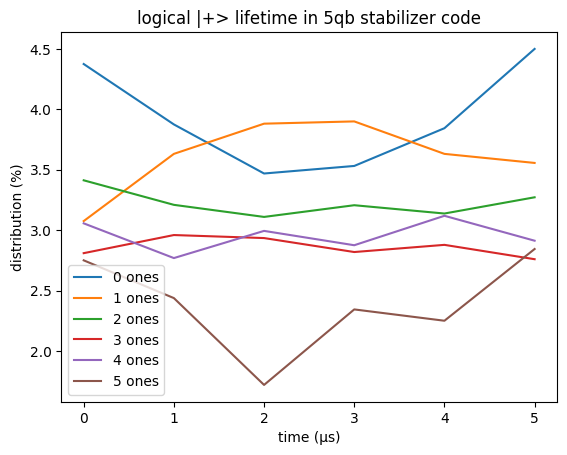

In [15]:

for n in [0,1,2,3,4,5]:

    n_ones_states = [s for s in states if sum([int(i) for i in s]) == n]
    plt.plot(x, [sum([r[s] for s in n_ones_states])/len(n_ones_states) for r in results], label=f"{n} ones")



# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime in 5qb stabilizer code')
plt.legend()

# Display the plot
plt.show()

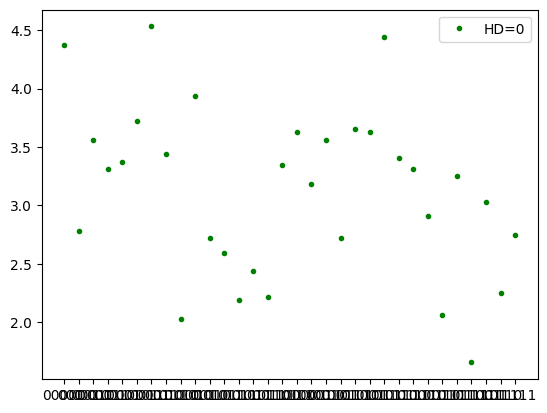

In [16]:
plot_results_hamming_distance(results[0], 5, valid_states)

TVD (final state)

In [17]:
alpha = {}

for s in states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


In [18]:
print(alpha)

print([f"{s}: {results[0][s]/100}" for s in states])

{'00000': 0.03125, '00001': 0.03125, '00010': 0.03125, '00011': 0.03125, '00100': 0.03125, '00101': 0.03125, '00110': 0.03125, '00111': 0.03125, '01000': 0.03125, '01001': 0.03125, '01010': 0.03125, '01011': 0.03125, '01100': 0.03125, '01101': 0.03125, '01110': 0.03125, '01111': 0.03125, '10000': 0.03125, '10001': 0.03125, '10010': 0.03125, '10011': 0.03125, '10100': 0.03125, '10101': 0.03125, '10110': 0.03125, '10111': 0.03125, '11000': 0.03125, '11001': 0.03125, '11010': 0.03125, '11011': 0.03125, '11100': 0.03125, '11101': 0.03125, '11110': 0.03125, '11111': 0.03125}
['00000: 0.04375', '00001: 0.0278125', '00010: 0.035625', '00011: 0.033125', '00100: 0.03375', '00101: 0.0371875', '00110: 0.0453125', '00111: 0.034375', '01000: 0.0203125', '01001: 0.039375', '01010: 0.0271875', '01011: 0.0259375', '01100: 0.021875', '01101: 0.024375', '01110: 0.0221875', '01111: 0.0334375', '10000: 0.03625', '10001: 0.031875', '10010: 0.035625', '10011: 0.0271875', '10100: 0.0365625', '10101: 0.03625'

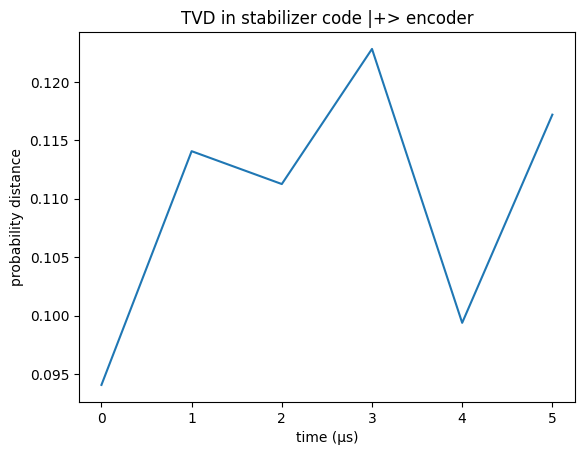

In [19]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in states])/2 for r in results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in stabilizer code |+> encoder')

# Display the plot
plt.show()

In [20]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 9.41%


TVD (logical measurement)

In [21]:
for i in range(len(t_array)):
    print(logical_meas_results[i])
    print(f"TVD: {logical_meas_results[i]['1'] / shots*100}%")

{'1': 1623, '0': 1577}
TVD: 50.71875%
{'0': 1560, '1': 1640}
TVD: 51.24999999999999%
{'1': 1716, '0': 1484}
TVD: 53.625%
{'1': 1670, '0': 1530}
TVD: 52.1875%
{'1': 1737, '0': 1463}
TVD: 54.28125%
{'0': 1534, '1': 1666}
TVD: 52.0625%
